In [1]:
from operators import BlockMatrixOperator, BlockTriangularPreconditioner
from tunnel_with_subdomains import load_matrices_from_hdf5, load_vectors_from_hdf5
from test_helper_functions import test_fgmres, test_dcg
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import time

In [46]:
problem_no = 0
path_to_data = f"exported_data_scaled/testrun_{problem_no}/"

# loading
A_blocks = load_matrices_from_hdf5(f"{path_to_data}data_as_blocks.h5")
Ptdiagblocks = load_matrices_from_hdf5(f"{path_to_data}data_diag_preco.h5")
Ptblocks = load_matrices_from_hdf5(f"{path_to_data}data_triang_preco.h5")
rhs_u, rhs_p = load_vectors_from_hdf5(f"{path_to_data}data_rhs.h5")  # each rhs_* is a list of ndarrays
sol_u, sol_p = load_vectors_from_hdf5(f"{path_to_data}data_sol.h5")  # each rhs_* is a list of ndarrays

In [79]:
iter_list, err_list, times_coarse_solver, times_fgmres, times_overhead, M = test_fgmres(
    A_blocks, Ptblocks, rhs_u, sol_u, rhs_p, sol_p, buffer_size=15, type="zero", use_dcg=False, tol=(1e-4, 1e-4))
res_zero = {"iter": iter_list, "err": err_list, "times_coarse_solver": times_coarse_solver, "times_fgmres": times_fgmres,
            "times_overhead": times_overhead, "M": M}

iter_list, err_list, times_coarse_solver, times_fgmres, times_overhead, M = test_fgmres(
    A_blocks, Ptblocks, rhs_u, sol_u, rhs_p, sol_p, buffer_size=15, type="previous", use_dcg=False, tol=(1e-4, 1e-4))
res_prev = {"iter": iter_list, "err": err_list, "times_coarse_solver": times_coarse_solver, "times_fgmres": times_fgmres,
            "times_overhead": times_overhead, "M": M}

iter_list, err_list, times_coarse_solver, times_fgmres, times_overhead, M = test_fgmres(
    A_blocks, Ptblocks, rhs_u, sol_u, rhs_p, sol_p, buffer_size=15, type="coarse", use_dcg=False, tol=(1e-4, 1e-4))

res_coarse = {"iter": iter_list, "err": err_list, "times_coarse_solver": times_coarse_solver, "times_fgmres": times_fgmres,
              "times_overhead": times_overhead, "M": M}

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...................................................................................................................
....................................................................................................
............................................................................

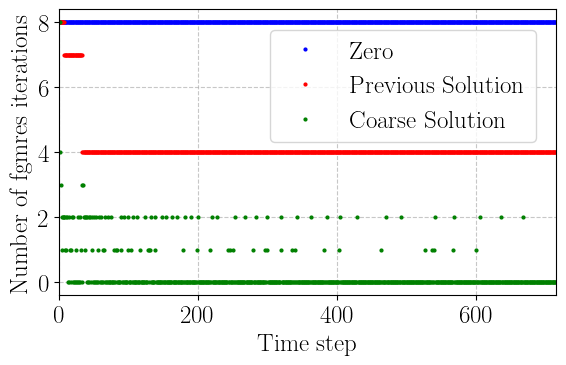

In [128]:
# Set LaTeX as the default text renderer
fontsize = 18
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": fontsize
})

plt.figure(figsize=(6, 4))
# Plot the iterations for each solver type
plt.plot(res_zero['iter'], 'b.', markersize=4, label='Zero')
plt.plot(res_prev['iter'], 'r.', markersize=4, label='Previous Solution')
plt.plot(res_coarse['iter'], 'g.', markersize=4, label='Coarse Solution')

# Use LaTeX formatting for labels
plt.xlabel(r'Time step', fontsize=fontsize)
plt.ylabel(r'Number of fgmres iterations', fontsize=fontsize)
# plt.title(r'Iteration comparison for different initial guess strategies', fontsize=fontsize)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(0.4, 0.97))

plt.xlim(0, 715)

plt.tight_layout()
# Save the plot to PDF
plt.savefig('iter_fgmres.pdf', format='pdf', bbox_inches='tight')

# Optional: Print confirmation
plt.show()

In [110]:
runtime_zero = sum(res_zero['times_coarse_solver']) + sum(res_zero['times_fgmres'])
runtime_prev = sum(res_prev['times_coarse_solver']) + sum(res_prev['times_fgmres'])
runtime_coarse = sum(res_coarse['times_coarse_solver']) + sum(res_coarse['times_fgmres'])

cumulative_iter_zero = sum(res_zero['iter'])
cumulative_iter_prev = sum(res_prev['iter'])
cumulative_iter_coarse = sum(res_coarse['iter'])

# print as latex table to by copyable use pandas (have row and colnames)
import pandas as pd

    # Round iterations to whole numbers and times to one decimal place
formatted_df = pd.DataFrame(
        {'Zero initial guess': [int(cumulative_iter_zero), round(runtime_zero, 1)],
         'Previous solution as initial guess': [int(cumulative_iter_prev), round(runtime_prev, 1)],
         'Coarse solution as initial guess': [int(cumulative_iter_coarse), round(runtime_coarse, 1)]},
        index=['Iterations', 'Runtime [s]'])

    # Set float format to ensure one decimal place
print(formatted_df.to_latex(float_format='%.1f'))

\begin{tabular}{lrrr}
\toprule
 & Zero initial guess & Previous solution as initial guess & Coarse solution as initial guess \\
\midrule
Iterations & 5720.0 & 2970.0 & 190.0 \\
Runtime [s] & 172.2 & 88.9 & 6.6 \\
\bottomrule
\end{tabular}



In [119]:
all_iters, all_errors, times = test_dcg(res_coarse['M'], 1e-4, block="u", type="none")
all_iters_DCG, all_errors_DCG, times_DCG = test_dcg(res_coarse['M'], 1e-4, block="u", type="y")

Index 0: 6, 4.510773573696685e-05, 0.0
Index 1: 6, 2.679924111444234e-05, 0.0
Index 2: 6, 7.044300678807008e-05, 0.0
Index 3: 7, 5.631153921204042e-05, 0.0
Index 4: 7, 4.247376725515518e-05, 0.0
Index 5: 7, 3.852000736456939e-05, 0.0
Index 6: 7, 5.1604695061070923e-05, 0.0
Index 7: 7, 3.828111992305328e-05, 0.0
Index 8: 6, 7.028550464881946e-05, 0.0
Index 9: 6, 2.6855375172435243e-05, 0.0
Index 10: 6, 6.849080780444606e-05, 0.0
Index 11: 7, 3.323558682049283e-05, 0.0
Index 12: 7, 4.393824903483396e-05, 0.0
Index 13: 7, 4.038894892829276e-05, 0.0
Index 14: 7, 5.053658357400749e-05, 0.0
Index 15: 7, 4.38012737874529e-05, 0.0
Index 16: 6, 2.6837178579991195e-05, 0.0
Index 17: 6, 8.334970149623085e-05, 0.0
Index 18: 7, 2.7408997881380628e-05, 0.0
Index 19: 7, 2.6026860950836696e-05, 0.0
Index 20: 5, 5.835471611631489e-05, 0.0
Index 21: 6, 4.0100709301095e-05, 0.0
Index 22: 6, 6.502128361459946e-05, 0.0
Index 23: 5, 3.157888879300747e-05, 0.0
Index 24: 5, 6.0640833069958776e-05, 0.0
Index 2

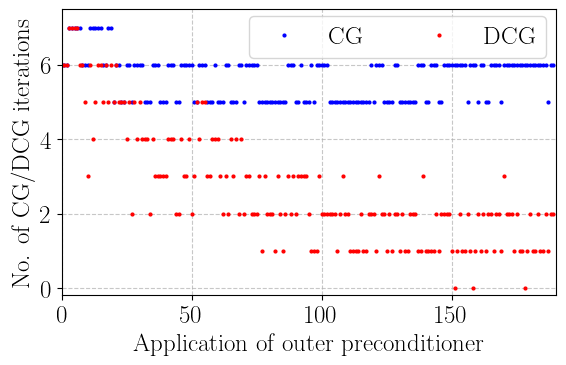

In [157]:
# Set LaTeX as the default text renderer
fontsize = 18
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": fontsize
})

plt.figure(figsize=(6, 4))
# Plot the iterations for each solver type
plt.plot(all_iters, 'b.', markersize=4, label='CG')
plt.plot(all_iters_DCG, 'r.', markersize=4, label='DCG')
# plt.plot(res_coarse['iter'], 'g.', markersize=4, label='Coarse Solution')

# Use LaTeX formatting for labels
plt.xlabel(r'Application of outer preconditioner', fontsize=fontsize)
plt.ylabel(r'No. of CG/DCG iterations', fontsize=fontsize)
# plt.title(r'Iteration comparison for different initial guess strategies', fontsize=fontsize)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.68, 1.02), ncol=2)

plt.xlim(0,190)
plt.ylim(-0.2, 7.5)

plt.tight_layout()
# Save the plot to PDF
plt.savefig('iter_DCG.pdf', format='pdf', bbox_inches='tight')

# Optional: Print confirmation
plt.show()

In [159]:
import pandas as pd

# Calculate total iterations and runtime for CG and DCG
total_iters_cg = sum(all_iters)
total_iters_dcg = sum(all_iters_DCG)
total_runtime_cg = sum(times)
total_runtime_dcg = sum(times_DCG)

# Create a DataFrame for comparison
cg_dcg_comparison = pd.DataFrame({
    'CG': [total_iters_cg, round(total_runtime_cg, 1)],
    'DCG': [total_iters_dcg, round(total_runtime_dcg, 1)]
}, index=['Iterations', 'Runtime [s]'])

# Display LaTeX table
print(cg_dcg_comparison.to_latex(float_format='%.1f'))

\begin{tabular}{lrr}
\toprule
 & CG & DCG \\
\midrule
Iterations & 1073.0 & 503.0 \\
Runtime [s] & 4.8 & 3.8 \\
\bottomrule
\end{tabular}

